<a href="https://colab.research.google.com/github/Chung-collab/GREAT-LAB/blob/main/Measure_Area_Distance_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Measure Area and Distance on Maps
Details refer to https://geopandas.org/getting_started/introduction.html

In [1]:
!pip install geopandas #mapping
!pip install contextily #basemap

     |████████████████████████████████| 994 kB 7.8 MB/s 
     |████████████████████████████████| 6.6 MB 36.9 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 19.3 MB 83 kB/s 


In [2]:
import geopandas as gpd
import contextily as ctx
from google.colab import drive
drive.mount('/content/drive/')
#import the Wellington City Council's Suburb Boundaries Map from https://data-wcc.opendata.arcgis.com/datasets/WCC::wcc-suburb-boundaries/about
data = gpd.read_file("drive/MyDrive/Colab Notebooks/WCC_Suburb_Boundaries.shp")
data.head()

Mounted at /content/drive/


,OBJECTID,postcode,supply_dat,suburb,ShapeSTAre,ShapeSTLen,geometry
0,1,6023,20030821,Berhampore,1.669267e+06,6612.318897,"POLYGON ((1748297.299 5424675.308, 1748398.062..."
1,2,6022,20030821,Breaker Bay,5.539493e+05,8308.105340,"POLYGON ((1753785.082 5422803.445, 1753767.180..."
2,3,6037,20060707,Churton Park,3.962032e+06,12624.122466,"POLYGON ((1751647.180 5438645.392, 1751965.964..."
3,4,6035,20030821,Crofton Downs,1.415715e+06,7294.937137,"POLYGON ((1747548.638 5431679.930, 1747570.856..."
4,5,6037,20030821,Glenside,2.065211e+06,7923.698075,"POLYGON ((1753384.754 5438603.409, 1753407.265..."


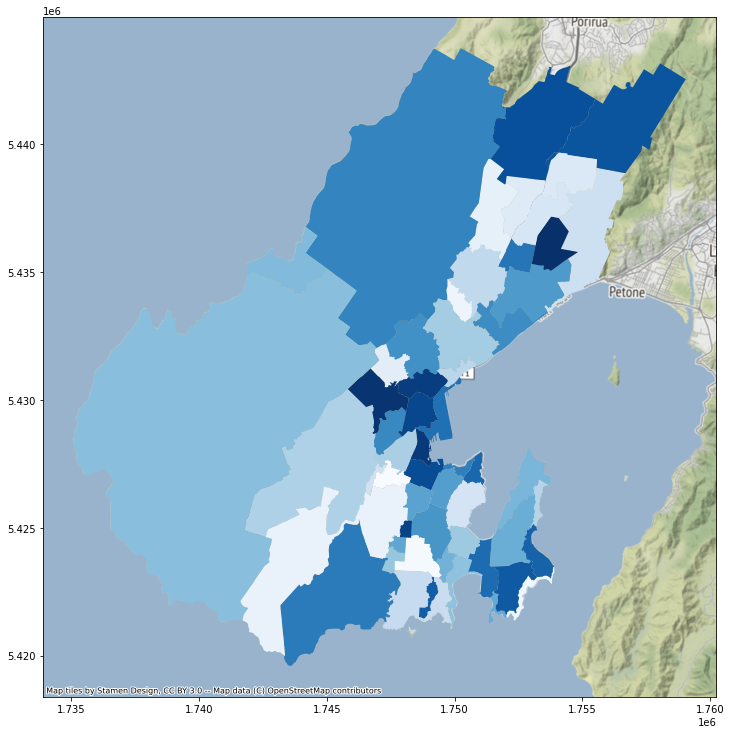

In [5]:
ax = data.plot(column="suburb", figsize=(25,12.5), cmap='Blues') #colored suburbs
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.Stamen.Terrain) #basemap

In [6]:
data_suburb = data.set_index("suburb") #set suburb column as the index
data_suburb["area"] = data_suburb.area/10**6 #measure the area of each suburb by .area in km2
data_suburb["area"]

suburb
Berhampore             1.669267
Breaker Bay            0.553949
Churton Park           3.962032
Crofton Downs          1.415715
Glenside               2.065211
Horokiwi               7.167945
Johnsonville           3.850436
Kingston               0.486785
Lyall Bay              0.973849
Moa Point              0.261024
Mornington             0.323307
Newlands               4.430200
Ngaio                  3.188906
Ngauranga              2.125761
Northland              1.352906
Ohariu                53.043269
Paparangi              1.200167
Pipitea                1.388584
Rongotai               1.515205
Southgate              0.444931
Strathmore Park        1.954587
Te Aro                 1.204152
Thorndon               1.473839
Woodridge              2.104272
Karaka Bays            0.458822
Maupuia                1.963265
Hataitai               1.878770
Roseneath              0.533323
Oriental Bay           0.333923
Wellington Central     0.656232
Makara Beach           3.336410
T

In [7]:
data_suburb.crs #check the coordinate system used and the unit of measure in metre

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
data_suburb['centroid']=data_suburb.centroid #define centroid of suburb boundary by the function .centroid 
first_point = data_suburb['centroid'].iloc[0] #define the first point as the centroid of the first suburb by the function .iloc[0]
data_suburb['distance'] = data_suburb['centroid'].distance(first_point) #measure the distance from the centroid of each suburb to the first point
data_suburb['distance']

suburb
Berhampore                0.000000
Breaker Bay            4468.853815
Churton Park          13866.807005
Crofton Downs          7563.737612
Glenside              14490.752055
Horokiwi              14461.512752
Johnsonville          11262.691514
Kingston               1006.912363
Lyall Bay              1733.197816
Moa Point              3593.634337
Mornington              939.356745
Newlands              11327.931100
Ngaio                  8270.621314
Ngauranga              9697.871305
Northland              5120.596952
Ohariu                14149.533444
Paparangi             12399.006123
Pipitea                5578.302355
Rongotai               2639.758613
Southgate              1652.407289
Strathmore Park        3814.263110
Te Aro                 3335.458339
Thorndon               5655.601345
Woodridge             13290.865767
Karaka Bays            5177.196356
Maupuia                5034.540484
Hataitai               2782.886385
Roseneath              4061.759440
Oriental Bay 

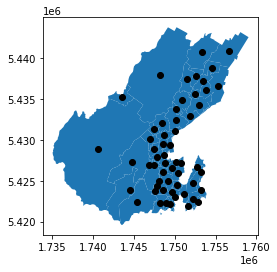

In [9]:
ax = data_suburb["geometry"].plot()
data_suburb["centroid"].plot(ax=ax, color="black") #plot the centroid as black dots

In [19]:
data_suburb.head() #Area, Centroid, and Distance are included in the dataframe

,OBJECTID,postcode,supply_dat,ShapeSTAre,ShapeSTLen,geometry,area,centroid,distance
suburb,,,,,,,,,
Berhampore,1,6023,20030821,1.669267e+06,6612.318897,"POLYGON ((1748297.299 5424675.308, 1748398.062...",1.669267,POINT (1748577.717 5423822.467),0.000000
Breaker Bay,2,6022,20030821,5.539493e+05,8308.105340,"POLYGON ((1753785.082 5422803.445, 1753767.180...",0.553949,POINT (1752832.113 5422454.707),4468.853815
Churton Park,3,6037,20060707,3.962032e+06,12624.122466,"POLYGON ((1751647.180 5438645.392, 1751965.964...",3.962032,POINT (1751470.866 5437384.105),13866.807005
Crofton Downs,4,6035,20030821,1.415715e+06,7294.937137,"POLYGON ((1747548.638 5431679.930, 1747570.856...",1.415715,POINT (1747466.177 5431304.085),7563.737612
Glenside,5,6037,20030821,2.065211e+06,7923.698075,"POLYGON ((1753384.754 5438603.409, 1753407.265...",2.065211,POINT (1752589.108 5437746.929),14490.752055
